In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model as slmodel
import matplotlib.pyplot as plt

In [3]:
table = pd.read_excel('RPL.xlsx', 'Лист1')
table.loc[table['Место'] == 1]

,Место,Клуб,Матчи,Победы,Ничьи,Поражения,Забито,Пропущено,Разница,Очки
0,1,Спартак,30,16,10,4,51,30,21,58
16,1,ЦСКА,30,21,3,6,60,26,34,66
32,1,ЦСКА,30,17,8,5,56,32,24,59
48,1,Локомотив,30,18,7,5,44,19,25,61
64,1,ЦСКА,30,18,8,4,48,20,28,62
80,1,ЦСКА,30,17,7,6,47,28,19,58
96,1,Зенит,30,18,7,5,54,32,22,61
112,1,Рубин,30,18,6,6,44,26,18,60
128,1,Рубин,30,19,6,5,62,21,41,63
144,1,Зенит,30,20,8,2,61,21,40,68


# Зависимость очков от забитых мячей

In [4]:
x = table['Забито'].values.reshape(-1, 1)
y = table.loc[:,'Очки'].values

In [5]:
model = slmodel.LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(4.790171859179246, array([1.00390613]))

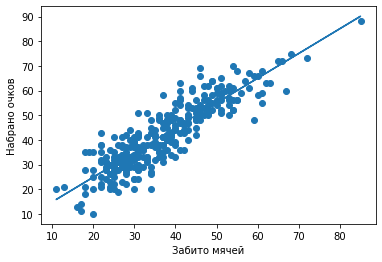

In [7]:
plt.scatter(table['Забито'], table['Очки'])
x1 = [model.coef_[0] * x + model.intercept_ for x in table['Забито'].values]
plt.plot([*table['Забито'].values], x1 , label = 'Прогнозная прямая')
plt.xlabel('Забито мячей')
plt.ylabel('Набрано очков')
plt.show()

# Задача 3.5

In [9]:
zadacha = {
    "S":pd.Series([3, 6, 5, 3.5, 1.5]),
    "Y":pd.Series([40, 55, 45, 30, 30]),
    "W":pd.Series([60, 36, 36, 15, 90])
}
zad = pd.DataFrame(zadacha)
zad

,S,Y,W
0,3.0,40,60
1,6.0,55,36
2,5.0,45,36
3,3.5,30,15
4,1.5,30,90


In [10]:
x = zad.iloc[:,1:]
y = zad.iloc[:,0]

model_zad = slmodel.LinearRegression()
model_zad.fit(x, y)
model_zad.intercept_, model_zad.coef_

(0.2787386557937661, array([ 0.12287913, -0.02940725]))

In [11]:
a = 40
b = 25
print('Прогноз б пункта:', model_zad.coef_[0]*a + model_zad.coef_[1]*b + model_zad.intercept_)

Прогноз б пункта: 4.45872243412688


In [12]:
delta = 10 
print('Оценка пунтка в:', model_zad.coef_[0]*delta)

Оценка пунтка в: 1.2287912666052874


In [13]:
delta1 = 5
delta2 = 15
print('Оцеонка г пункта:', model_zad.coef_[0]*delta1 + model_zad.coef_[1]*delta2)

Оцеонка г пункта: 0.17328686044982222


## Последний пункт

In [14]:
zad['model'] = model_zad.coef_[0]*zad.Y + model_zad.coef_[1]*zad.W + model_zad.intercept_
zad['error'] = zad.S - zad.model
zad

,S,Y,W,model,error
0,3.0,40,60,3.429469,-0.429469
1,6.0,55,36,5.978430,0.021570
2,5.0,45,36,4.749638,0.250362
3,3.5,30,15,3.524004,-0.024004
4,1.5,30,90,1.318460,0.181540


In [15]:
import statistics

In [16]:
statistics.variance(zad.error)

0.07028064579771125